### Code generated by CHATGPT


<Figure size 800x500 with 0 Axes>

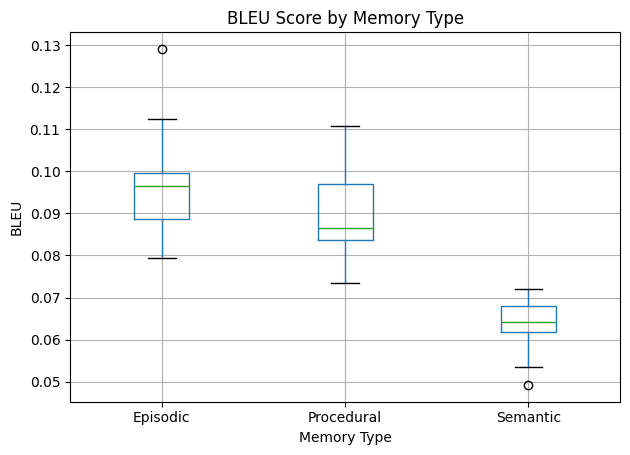

<Figure size 800x500 with 0 Axes>

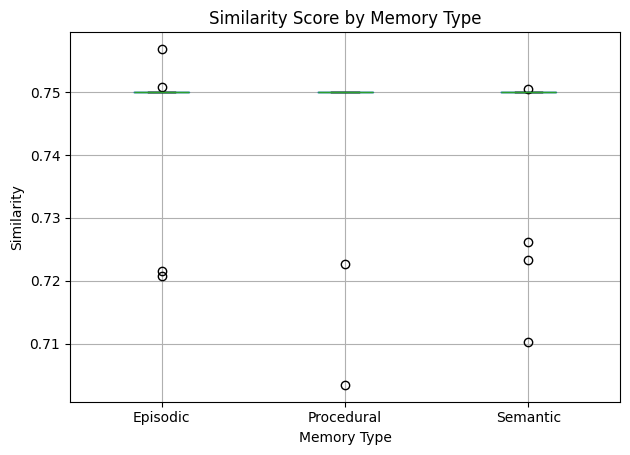

<Figure size 800x500 with 0 Axes>

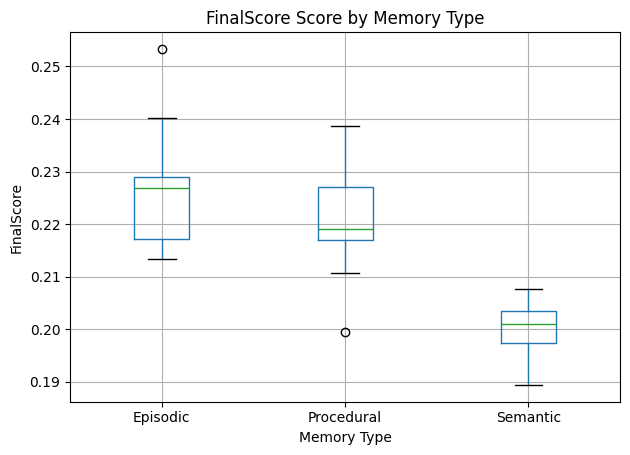

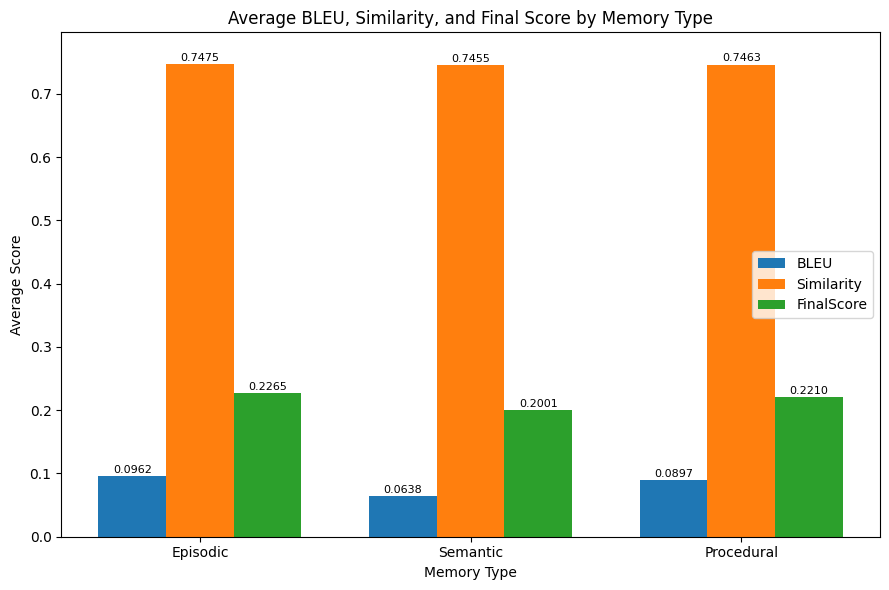

In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

memory_dirs = ['episodic_memory', 'semantic_memory', 'procedural_memory']
records = []
averages = []

for memory_type in memory_dirs:
    result_path = os.path.join(memory_type, 'result20.txt')
    if not os.path.exists(result_path):
        print(f"File not found: {result_path}")
        continue

    with open(result_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    avg = data[-1]
    averages.append({
        'MemoryType': memory_type.replace('_memory', '').capitalize(),
        'AverageBLEU': avg['average_bleu'],
        'AverageSimilarity': avg['average_similarity'],
        'AverageFinalScore': avg['average_final_score']
    })

    for entry in data[:-1]:
        records.append({
            'MemoryType': memory_type.replace('_memory', '').capitalize(),
            'BLEU': entry['bleu'],
            'Similarity': entry['similarity'],
            'FinalScore': entry['final_score']
        })

df = pd.DataFrame(records)

metrics = ['BLEU', 'Similarity', 'FinalScore']
for metric in metrics:
    plt.figure(figsize=(8, 5))
    df.boxplot(column=metric, by='MemoryType')
    plt.title(f'{metric} Score by Memory Type')
    plt.suptitle('')
    plt.xlabel('Memory Type')
    plt.ylabel(metric)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

avg_df = pd.DataFrame(averages)

group_metrics = ['AverageBLEU', 'AverageSimilarity', 'AverageFinalScore']
metric_labels = ['BLEU', 'Similarity', 'FinalScore']
bar_width = 0.25
x = np.arange(len(avg_df['MemoryType']))

plt.figure(figsize=(9, 6))
for i, metric in enumerate(group_metrics):
    plt.bar(x + i * bar_width, avg_df[metric], width=bar_width, label=metric_labels[i])

plt.xlabel('Memory Type')
plt.ylabel('Average Score')
plt.title('Average BLEU, Similarity, and Final Score by Memory Type')
plt.xticks(x + bar_width, avg_df['MemoryType'])
plt.ylim(0, max(avg_df[group_metrics].max()) + 0.05)
plt.legend()

# 添加柱子数值标签
for i, metric in enumerate(group_metrics):
    for j, value in enumerate(avg_df[metric]):
        plt.text(x[j] + i * bar_width, value + 0.002, f'{value:.4f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()
